In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/POWERGRID.csv')

In [3]:
# Display first few rows
print(df.head())

         Date     Symbol Series  Prev Close   Open    High     Low    Last  \
0  2007-10-05  POWERGRID     EQ       52.00   89.8  109.50   83.15  100.20   
1  2007-10-08  POWERGRID     EQ      100.60  104.0  104.00   94.85   95.30   
2  2007-10-09  POWERGRID     EQ       95.45   95.5  102.85   90.35  102.10   
3  2007-10-10  POWERGRID     EQ      101.95  104.6  105.00  102.00  102.65   
4  2007-10-11  POWERGRID     EQ      102.90  120.0  120.00  102.00  114.85   

    Close    VWAP     Volume      Turnover  Trades  Deliverable Volume  \
0  100.60  102.49  481058927  4.930561e+15     NaN           181390171   
1   95.45   98.12   71252858  6.991616e+14     NaN            22115293   
2  101.95   98.57   65658228  6.471784e+14     NaN            16991920   
3  102.90  103.66   38211410  3.960887e+14     NaN            16409289   
4  114.40  110.78   59805552  6.625235e+14     NaN            17530826   

   %Deliverble  
0       0.3771  
1       0.3104  
2       0.2588  
3       0.4294  
4

In [4]:
# Display basic statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  3359.000000  3359.000000  3359.000000  3359.000000  3359.000000   
mean    141.332123   141.497246   143.342513   139.468309   141.372715   
std      41.954289    41.993967    42.299214    41.696305    41.929357   
min      52.000000    61.700000    62.000000    52.000000    59.150000   
25%     104.400000   104.475000   105.825000   103.100000   104.450000   
50%     133.050000   133.000000   134.850000   131.250000   133.000000   
75%     185.075000   185.475000   187.875000   182.925000   185.250000   
max     236.500000   234.400000   238.300000   228.750000   235.250000   

             Close         VWAP        Volume      Turnover         Trades  \
count  3359.000000  3359.000000  3.359000e+03  3.359000e+03    2456.000000   
mean    141.382152   141.426859  6.019073e+06  8.986049e+13   38764.626221   
std      41.947928    41.965621  1.244297e+07  1.601171e+14   28682.079786   
min      58.000000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3359 non-null   object 
 1   Symbol              3359 non-null   object 
 2   Series              3359 non-null   object 
 3   Prev Close          3359 non-null   float64
 4   Open                3359 non-null   float64
 5   High                3359 non-null   float64
 6   Low                 3359 non-null   float64
 7   Last                3359 non-null   float64
 8   Close               3359 non-null   float64
 9   VWAP                3359 non-null   float64
 10  Volume              3359 non-null   int64  
 11  Turnover            3359 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3359 non-null   int64  
 14  %Deliverble         3359 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 393.8

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3354,2021-04-26,POWERGRID,EQ,211.15,208.20,216.45,208.20,215.75,215.80,213.23,10765892,2.295642e+14,72260.0,3544712,0.3293
3355,2021-04-27,POWERGRID,EQ,215.80,216.05,220.50,215.80,216.40,216.65,217.89,8589721,1.871605e+14,77004.0,2723654,0.3171
3356,2021-04-28,POWERGRID,EQ,216.65,218.80,221.70,216.30,221.35,220.90,219.20,9215766,2.020103e+14,55866.0,3775749,0.4097
3357,2021-04-29,POWERGRID,EQ,220.90,223.10,223.65,219.05,219.80,220.15,220.60,8303610,1.831748e+14,48655.0,3692925,0.4447
3358,2021-04-30,POWERGRID,EQ,220.15,217.75,222.30,216.65,220.35,220.05,220.24,9504624,2.093328e+14,56225.0,4634594,0.4876


In [8]:
df.shape

(3359, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                903
Deliverable Volume      0
%Deliverble             0
dtype: int64


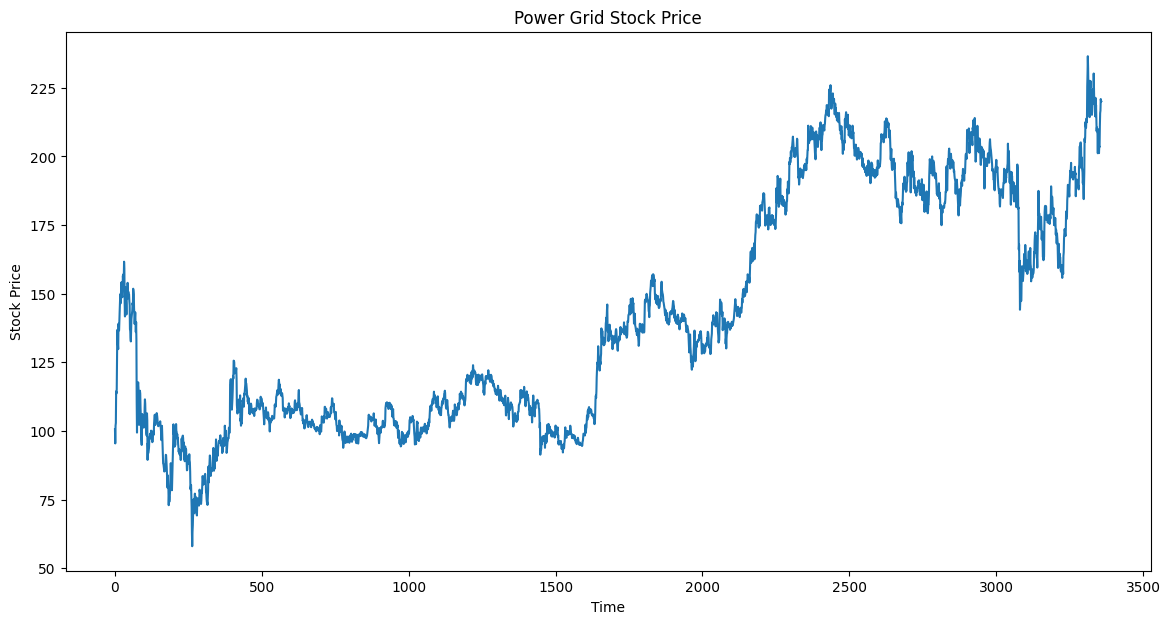

In [10]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Power Grid Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [11]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

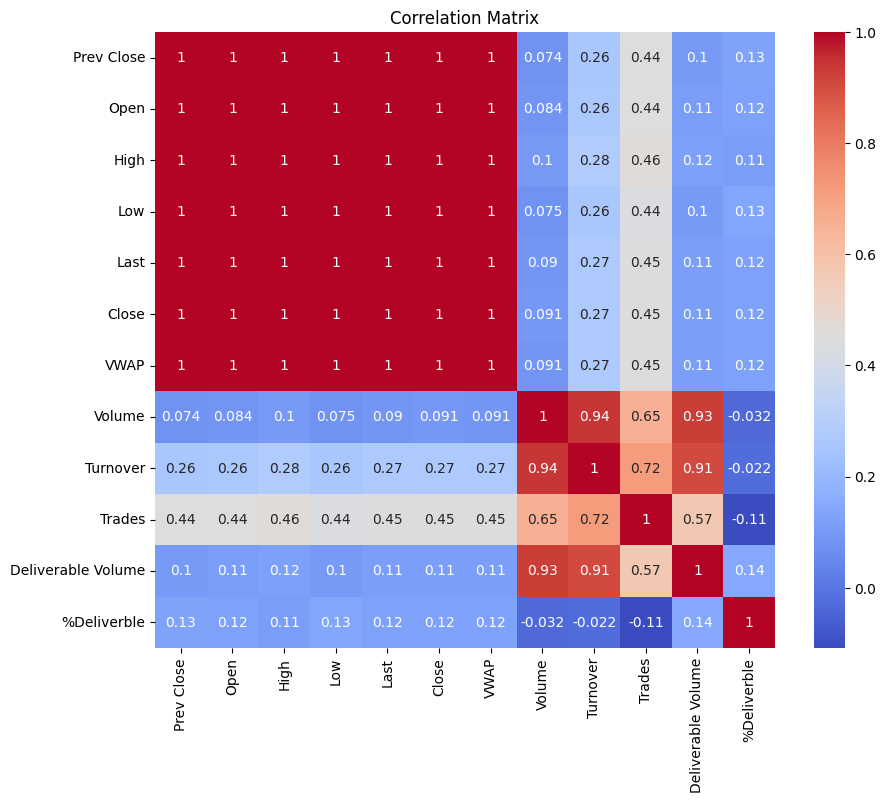

In [13]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

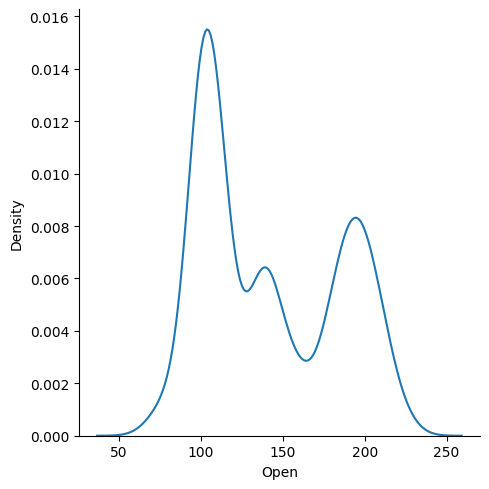

In [14]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

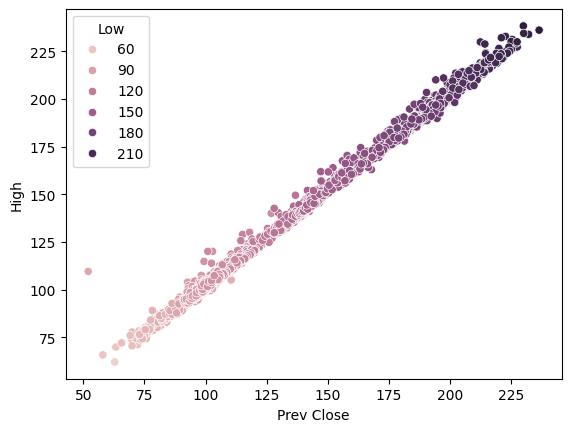

In [15]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

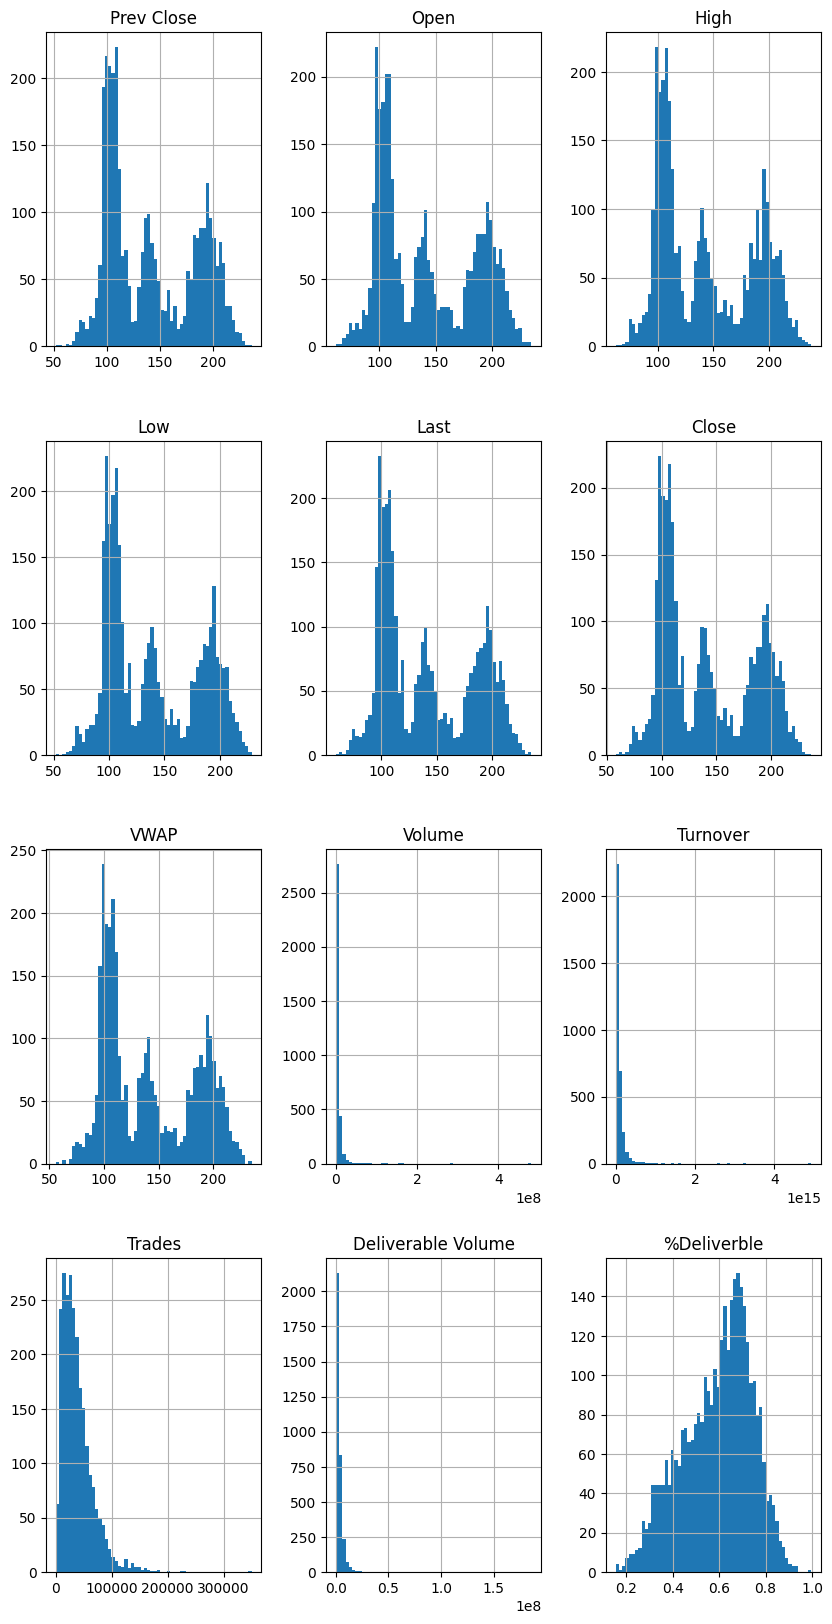

In [16]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

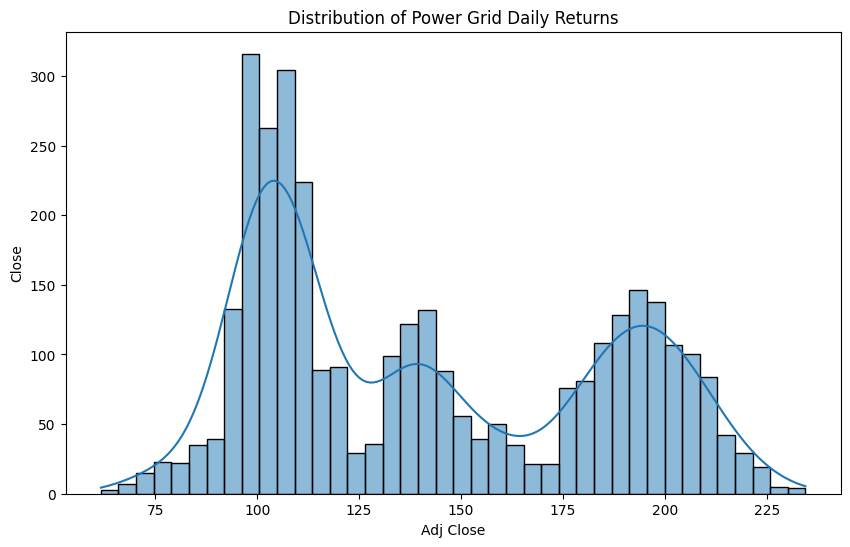

In [17]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Power Grid Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

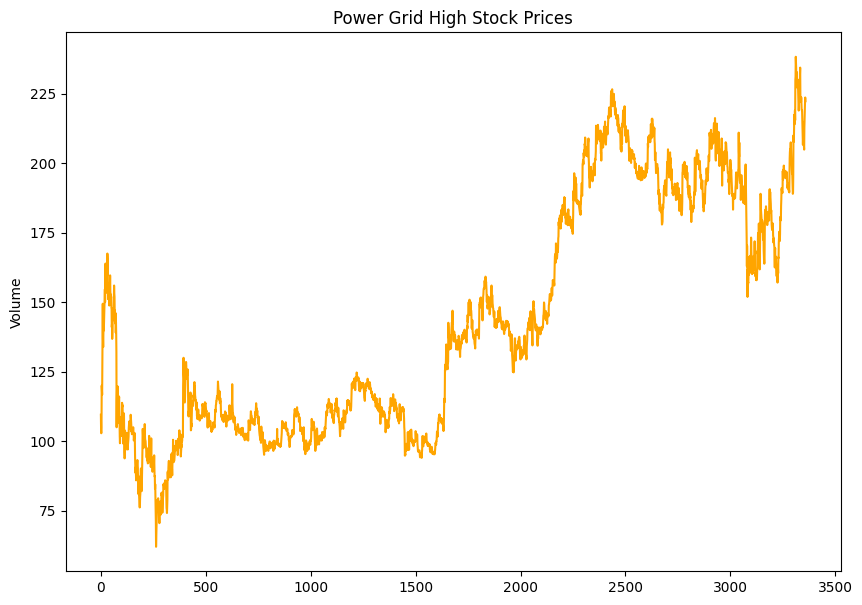

In [18]:
# Plot Power Grid High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Power Grid '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

volume_analysis(df,'High')

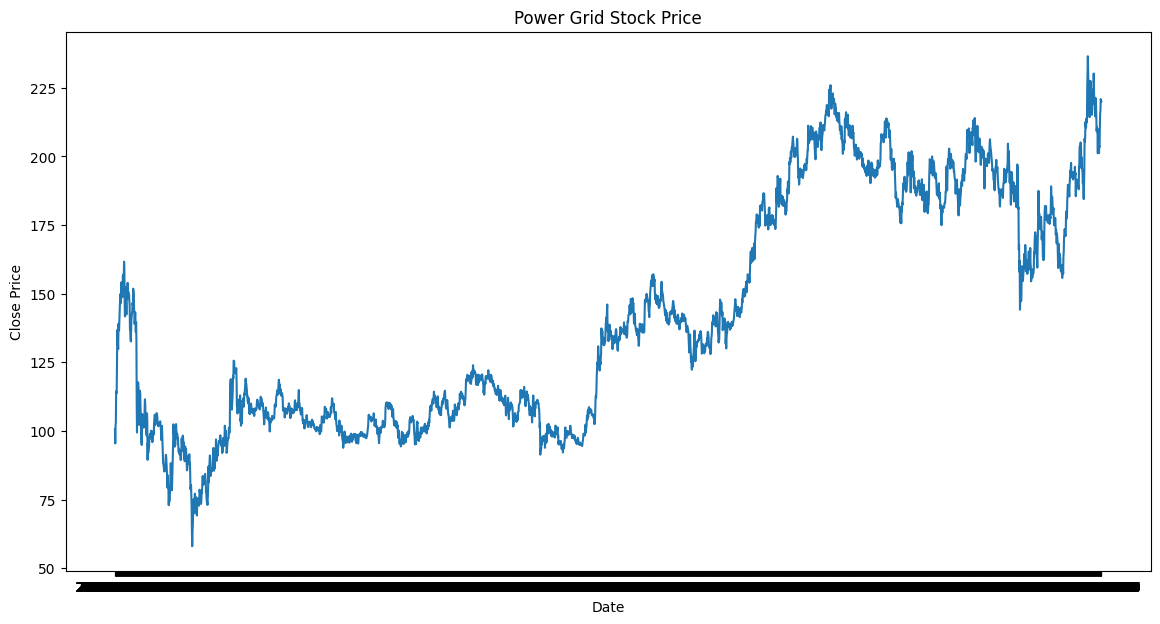

In [19]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.title('Power Grid Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [20]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Data Preprocessing**


In [21]:
# Selecting features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])

# Converting to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=features + [target])

**Step 3: Splitting the Data into Training and Testing Sets**

In [22]:
# Splitting the data
X = df_scaled[features]
y = df_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Step 5: Comparing and Predicting with differnt Models**

**LSTM Model**

In [35]:
# Creating a dataset with time steps for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)] # Remove the second index as data is 1D
        X.append(a)
        Y.append(data[i + time_step]) # Remove the second index here as well
    return np.array(X), np.array(Y)

time_step = 10 # Define time_step variable
X_lstm, y_lstm = create_dataset(df_scaled[target].values, time_step)

X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# Building the LSTM model  <-- Removed 'time_s' and placed comment on a separate line
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) # Output layer remains the same as we are predicting a single value

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_lstm, y_train_lstm, batch_size=1, epochs=1)

# Fit the scaler on the target variable only
scaler = MinMaxScaler()
scaler.fit(df_scaled[target].values.reshape(-1, 1))

# Predicting the results
train_predict = model.predict(X_train_lstm)
test_predict = model.predict(X_test_lstm)

# Reshape the predictions to be 2D arrays as the scaler expects a 2D input
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Inverse transform the predictions
train_predict_inverted = scaler.inverse_transform(train_predict)
test_predict_inverted = scaler.inverse_transform(test_predict)

# Calculate RMSE
# Evaluating the model
print('Train RMSE:', np.sqrt(mean_squared_error(y_train_lstm, train_predict_inverted)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test_lstm, test_predict_inverted)))

21/21 [==============================] - 0s 4ms/step
Train RMSE: 0.031672758032212756
Test RMSE: 0.05236293627480167


**SVM Model**


In [36]:
# Training the SVM model
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm_model.fit(X_train, y_train)

# Predicting the results
svm_predictions = svm_model.predict(X_test)

# Evaluating the model
print('SVM RMSE:', np.sqrt(mean_squared_error(y_test, svm_predictions)))

SVM RMSE: 0.04102661929020664


**K-Nearest Neighbors (KNN) Model**


In [37]:
# Training the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting the results
knn_predictions = knn_model.predict(X_test)

# Evaluating the model
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_predictions)))

KNN RMSE: 0.01106317245541035


**Stock Analysis Chart**


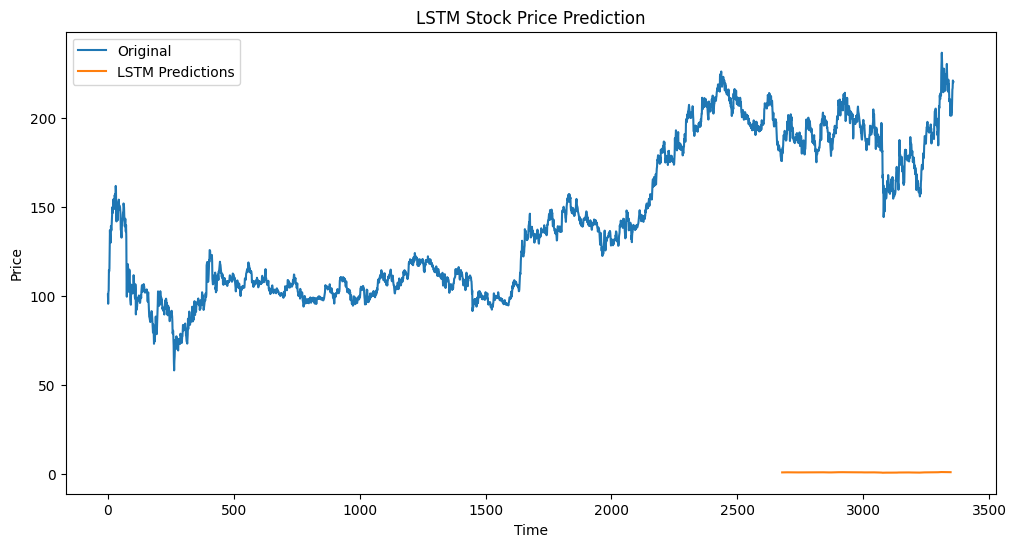

In [38]:
# Plotting the results for each model

# LSTM Predictions
plt.figure(figsize=(12, 6))
plt.plot(df[target].values, label='Original')
plt.plot(np.arange(len(y_train_lstm), len(y_train_lstm) + len(test_predict)), test_predict, label='LSTM Predictions')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

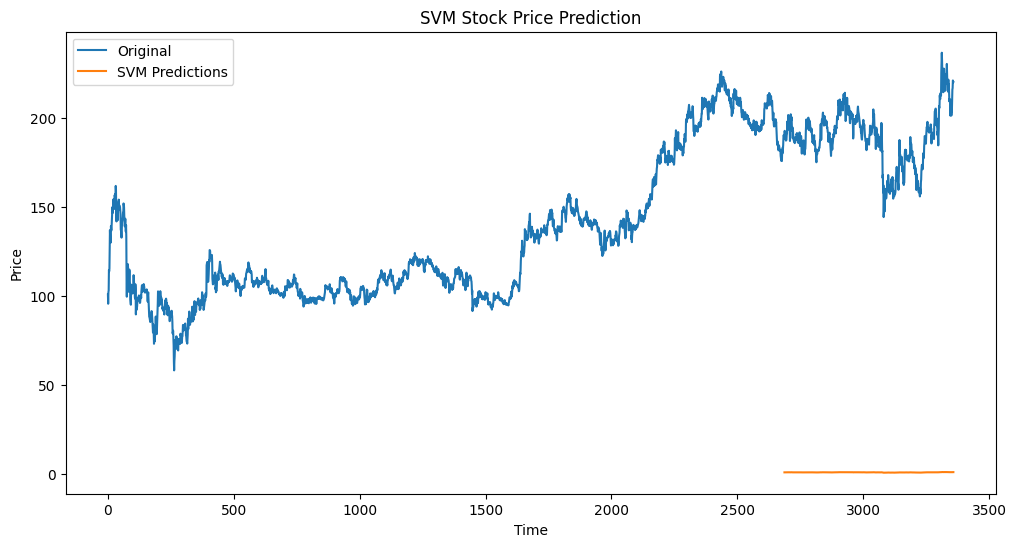

In [39]:
# SVM Predictions
plt.figure(figsize=(12, 6))
plt.plot(df[target].values, label='Original')
plt.plot(np.arange(len(y_train), len(y_train) + len(svm_predictions)), svm_predictions, label='SVM Predictions')
plt.title('SVM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

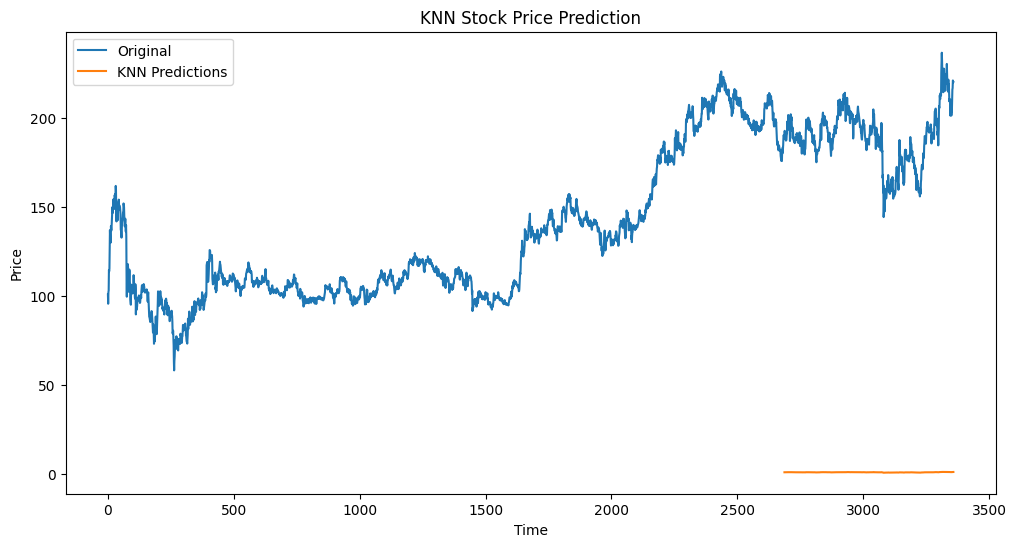

In [40]:
# KNN Predictions
plt.figure(figsize=(12, 6))
plt.plot(df[target].values, label='Original')
plt.plot(np.arange(len(y_train), len(y_train) + len(knn_predictions)), knn_predictions, label='KNN Predictions')
plt.title('KNN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()